In [18]:
from sklearn.datasets import make_blobs
X, z = make_blobs(n_features=2, n_samples=1000, centers=5)
print(X[:10]) # features
print(z[:10]) # group of data or target

[[10.34337448  1.5293336 ]
 [ 2.41543989 -2.97233393]
 [ 8.00142811  2.939453  ]
 [ 2.91068605  9.22282443]
 [ 8.78413127  4.94964972]
 [ 8.10384679  6.45195689]
 [ 1.63929286  9.86971698]
 [ 8.04110833  4.76534915]
 [ 1.18722457  8.7508417 ]
 [ 8.7596888   3.31329493]]
[4 2 0 3 0 0 1 0 1 4]


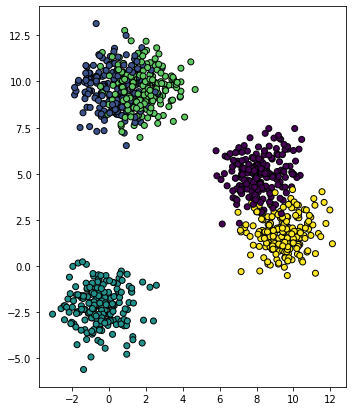

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,7))
plt.axes(aspect=1)
plt.scatter(X[:,0], X[:,1], c=z, edgecolor='k')
plt.show()

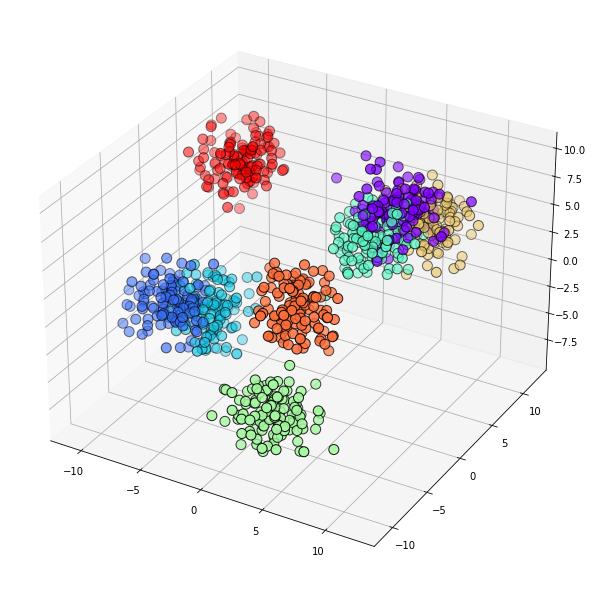

In [36]:
from mpl_toolkits.mplot3d import Axes3D

X, z = make_blobs(n_samples=1000, n_features=3, centers=8,
                 cluster_std=1.5)
plt.figure(figsize=(8,8))
ax = plt.axes([0,0,1,1], projection='3d',
             xlim=(X.min(), X.max()),
             ylim=(X.min(), X.max()))
ax.scatter(X[:,0], X[:,1], X[:,2], c=z, edgecolor='k', cmap='rainbow',
          s=100)
plt.show()

In [38]:
class LogisticRegression:
    def __init__(self, eta):
        self.eta = eta
    def learn(self, X, z, n_learns):
        self.sse = []
        self.correct_prediction = []
        # np.zeros like, [0,0,0]
        self.w = np.zeros(X.shape[1] + 1) # +1 is represented as w_0
        
        phi = self.cal_sigmoid(X)
        for i in range(n_learns):
            eee = 2 * phi * (1-phi) * (z-phi)
            self.w[1:] += np.dot(X.T, eee) * self.eta
            self.w[0] +=eee.sum() * self.eta
            phi = self.cal_sigmoid(X)
            is_true = np.abs(phi-z) < 0.5
            self.correct_prediction += [ is_true.sum()]
            self.sse += [self.cal_sse(X, z)]
    def predict(self, X):
        return self.cal_sigmoid(X) > 0.5
    def cal_sigmoid(self, X):
        def sigmoid(x):
            return 1/(1+np.exp(-x))
        return sigmoid(np.dot(X, self.w[1:]) + self.w[0])
    def cal_sse(self, X, z):
        return ((z-self.cal_sigmoid(X)) ** 2).sum()


In [39]:
# use this class
# data = np.load('pea-data.npz')
# x_pea = data['x']
# y_pea = data['y']
# is_grown = data['z']

# model = LogisticRegression(eta=0.00001)
# xy_pea = np.stack([x_pea, y_pea], axis=1)

# model.learn(xy_pea, is_grown, n_learns=10000)
# print('ได้สมการเส้นแบ่งเขตเป็น %.3fx%+.3fy%+.3f = 0'%(model.w[1],model.w[2],model.w[0]))
# print('ทายถูกทั้งหมด %d จาก %d'%(model.correct_prediction[-1],
#                                  len(is_grown)))
        
        

# Vizualize **Blobs** by Logistic Regression

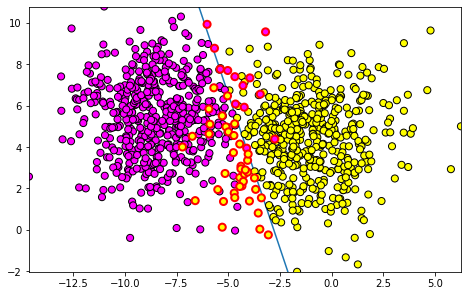

In [48]:
import numpy as np
X, z = make_blobs(n_samples=1000, n_features=2, centers=2,
                 cluster_std=2, random_state=7)

lr = LogisticRegression(eta=.00002)
lr.learn(X, z, n_learns=5000)

x_line = np.array([X[:,0].min(), X[:,1].max()])
y_line = - (lr.w[0] + lr.w[1]*x_line) / lr.w[2]
is_pred_true = lr.predict(X) == z

ax = plt.axes([0,0,1,1], aspect=1, 
             xlim=[X[:,0].min(), X[:,0].max()],
             ylim=[X[:,1].min(), X[:,1].max()])
plt.plot(x_line, y_line, zorder=0)
plt.scatter(X[is_pred_true==1, 0], X[is_pred_true==1, 1],
           c=z[is_pred_true]==1, s=50, edgecolor='k', cmap='spring')
plt.scatter(X[is_pred_true==0, 0], X[is_pred_true==0, 1],
           c=z[is_pred_true==0], s=50, edgecolor='r', cmap='spring',
            lw=2)


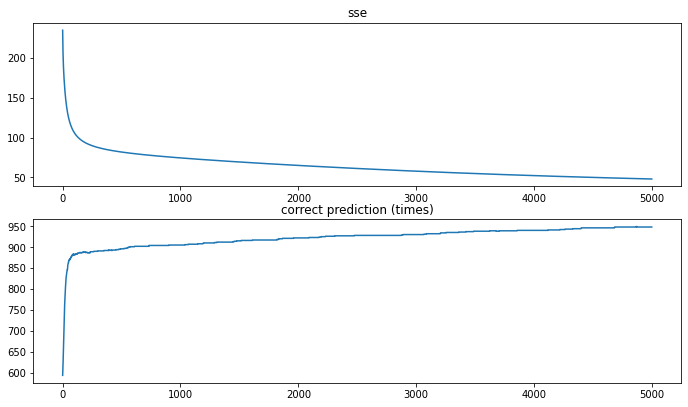

In [51]:
plt.figure(figsize=(9,5))
plt.subplot(211)
plt.title('sse')
plt.plot(lr.sse)

plt.subplot(212)
plt.title('correct prediction (times)')
plt.plot(lr.correct_prediction)

plt.subplots_adjust(0,0,1,1)
plt.show()

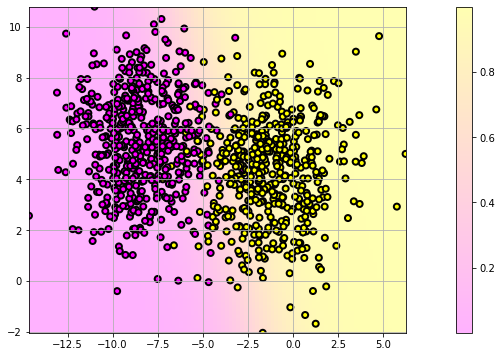

In [65]:
xm, ym = np.meshgrid(np.linspace(X[:,0].min(), X[:,0].max(), 100),
                    np.linspace(X[:,1].min(), X[:,1].max(), 100))
Xm = np.stack([xm.ravel(), ym.ravel()], 1)
zm = lr.cal_sigmoid(Xm).reshape(100, 100) # find probability instead of get 
# target value 0,1 from lr.predict()

plt.figure(figsize=(9,6))
plt.axes(xlim=(X[:,0].min(), X[:,0].max()),
        ylim=(X[:,1].min(), X[:,1].max()))
plt.pcolormesh(xm, ym, zm, cmap='spring', alpha=0.3)
plt.colorbar(pad=0.1)
plt.scatter(X[:,0], X[:,1], c=z, cmap='spring', lw=2, 
           edgecolor='k')
plt.grid()
plt.show()